# The *apply family

**lapply**: loops over a list and applies a function to every element of that list (returns a list)  
**sapply**: a variant of lapply that simplifies the results (returns a vector or matrix if possible)  
**apply**: a function that loops over the margins (rows or columns) of an array, useful for taking summaries of matrices or higher dimensional arrays  
**tapply**: short for "table apply". Applies a function over subsets of a vector  

**Sidebar: Anonymous functions**: functions used inside the `*apply` functions  

## lapply

Arguments of the `lapply` function:

In [35]:
args(lapply)

function (X, FUN, ...) 
NULL

`lapply` takes three arguments:  

* `x` a list   
* `FUN` a function   
* `...` which can be used to pass arguments to the function   
 
 If `x` is not a list it will be coerced to a list and `lapply` always returns a list. 

**Example:** Looping over a list with three elements, _a_, _b_ and _c_ and taking the mean of each.

In [7]:
# Create a list of three vectors
my_list <- (list(a = 1:100, b = rnorm(100, 10, 4), c = rnorm(100, 20, 5)))

# Take the mean of each vector
sapply(my_list, mean)

a        b        c 
50.50000 10.18416 19.66908

**Example:** R will loop over vector _x_ and generate x number of random normal variables for each loop. 

In [8]:
# Create vector (1, 2, 3, 4, 5)
x <- 1:5

# Generate a list with five elements, each containing x number of random normal variables
lapply(x, rnorm)

[[1]]
[1] 0.205901

[[2]]
[1] -1.6854674 -0.2562304

[[3]]
[1] 0.4057818 1.1191714 0.3667741

[[4]]
[1]  2.0995034 -1.7395662 -0.9817286 -0.4995344

[[5]]
[1]  0.8090133  0.8735548  0.0288271 -0.6998621  1.7302662

**Example cont.:** We can specify the arguments of the function in FUN by passing them to the `...` argument.

In [9]:
# Generate numbers from the normal distribution with mean 10 and sd 2
x <- 1:5
lapply(x, rnorm, mean = 10, sd = 2) #default is mean = 0 and sd = 1

[[1]]
[1] 10.61485

[[2]]
[1] 12.13736 12.73147

[[3]]
[1] 10.410101  8.859905 10.707069

[[4]]
[1]  7.963782  7.659325 12.569275 10.316600

[[5]]
[1] 10.792976  8.459754  6.956462 12.219775 11.068003

## Sidebar: Anonymous Functions

The `*apply` family functions make heavy use of anonymous functions. If we want to apply a function that does not already exist as a function in R, we need to write our own function directly within the apply function.     

**Example:** Let us say we have two matrices and we want to extract a specific row or column, we can do this by passing an anonymous function. 

In [36]:
# Create a list of two matrices
mat_list <- list(matrix(1:4, nrow = 2), matrix(1:9, nrow = 3))

# View the matrices
mat_list

[[1]]
     [,1] [,2]
[1,]    1    3
[2,]    2    4

[[2]]
     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9

Here we extract the second row from each matrix by adding the anonymous function to the lapply function.

In [37]:
# Extract the second rows
lapply(mat_list, function(row2) row2[2,])

[[1]]
[1] 2 4

[[2]]
[1] 2 5 8

## sapply
The only difference from `lapply` is that `sapply` always tries to simplify the result if possible. The output of the `lapply` function is always a list. The output in `sapply` will be:  

* If the result is a list where each element is length 1: a vector  
* If the result is a list where each element is a vector of same length > 1: a matrix  
* Otherwise a list   

**Example:** result is a vector  
Taking the mean of each element in the list. 

In [38]:
# This funciton gives two elements of length 1, result as a vector
my_list <- (list(a = 1:10, b = 11:20, c = 21:30, d = 31:40))
sapply(my_list, mean)

a    b    c    d 
 5.5 15.5 25.5 35.5

**Example:** result is a matrix  
Extracting the first columns from each element in the list.

In [39]:
# Create three 2x2 matrices
mat3 <- list(matrix(1:4, 2, 2), matrix(5:8, 2, 2), matrix(9:12, 2, 2))

# Using an anonymous function. sapply gives three vectors of equal length 2, result is a matrix
sapply(mat3, function(col1) col1[, 1])

1,5,9
2,6,10


## apply
Used to evaluate a function over the **margins** of an array (most commonly applied to rows or columns of matrices or higher dimensional arrays). 

In [34]:
# Show arguments for apply
args(apply)

function (X, MARGIN, FUN, ..., simplify = TRUE) 
NULL

The argument MARGIN specifies which margin that should be retained. 1 loops over the rows and 2 loops over the columns. 

In [32]:
# 10x5 matrix of random variables from the uniform dist between 1 and 10
my_uniform_mat <- matrix(runif(50, 1, 10), nrow = 10, ncol = 5)
my_uniform_mat


1.883313,7.704569,4.996195,4.569993,4.872784
7.130496,1.549730,7.020631,6.872292,8.824662
1.164540,2.499555,9.994835,3.181994,1.582313
6.398221,4.513965,8.713884,1.773331,3.356024
5.664921,4.697765,1.235739,3.390958,8.906645
5.890806,3.811863,7.317832,9.712688,7.690257
5.834597,3.439693,4.548112,4.237360,6.444859
9.631131,7.752691,2.305237,3.516332,5.846555
4.456253,3.465578,8.303156,6.624824,3.608823
8.814388,1.873715,8.121180,3.548439,5.349127


In [33]:
# Means for all rows
apply(my_uniform_mat, 1, mean)

# Means for all columns
apply(my_uniform_mat, 2, mean)

[1] 4.805371 6.279562 3.684647 4.951085 4.779206 6.884689 4.900924 5.810389
 [9] 5.291727 5.541370

[1] 5.686867 4.130913 6.255680 4.742821 5.648205

There are already functions for row/col sums and means in R:  

* rowRums = apply(x, 1, sum)    
* colSums = apply(x, 2, sum)    
* rowMeans = apply(x, 1, mean)    
* colMeans = apply(x, 2, mean)    

These are optimized and more efficient than using the apply function. But we can evaluate other functions such as quantiles.


In [40]:
my_uni_mat <- matrix(runif(200, min= 0, max = 19), 20, 10)

# Specifying which quantiles in the ... argument
apply(my_uni_mat, 1, quantile, probs = c(0.25, 0.75))

25%,8.509098,7.889393,2.965492,8.175409,7.734497,4.671578,7.412923,2.268708,7.904314,2.00385,1.168130,3.049885,3.256563,4.62149,1.061186,1.633161,5.216018,2.821044,9.882655,5.830384
75%,14.585824,14.557011,13.235647,15.372744,14.264659,15.246440,14.043561,13.695172,16.016827,14.19485,7.318384,14.025878,9.088141,10.57935,14.044954,11.960597,15.007202,10.617781,14.835662,13.143722


Same as

In [ ]:
rowMeans(x, dim = 2)

## tapply
`tapply` applies a function over a subsets of a vector. For this we need to specify a vector (arg INDEX) to identify which elements of the numeric vector we are going to calculate something on.

For example we can have a data set with men and women, and we want to evaluate the mean height for both groups respectively. 

In [22]:
args(tapply)

function (X, INDEX, FUN = NULL, ..., default = NA, simplify = TRUE) 
NULL

 * X: a vector  
 * INDEX: a factor or a list of factors  
 * FUN: the function we want to apply  
 * ... : other arguments to be passed to FUN  

In [42]:
# Create a data frame
person <- c("Kalle", "Anders", "Karin", "Sigrid", "Herman", "Pelle", "Hanna", "Anna")
sex <- factor(c("Male", "Male", "Female", "Female", "Male", "Male", "Female", "Female"))
height <- c(195, 190, 155, 165, 178, 201, 169, 170)
nationality <- factor(c("Swedish", "Swedish", "Norwegian", "Danish", "Swedish", "Danish", "Swedish", "Danish"))

my_df <- data.frame(person, sex, height, nationality)
my_df


person,sex,height,nationality
<chr>,<fct>,<dbl>,<fct>
Kalle,Male,195,Swedish
Anders,Male,190,Swedish
Karin,Female,155,Norwegian
Sigrid,Female,165,Danish
Herman,Male,178,Swedish
Pelle,Male,201,Danish
Hanna,Female,169,Swedish
Anna,Female,170,Danish


In [43]:
# Get the mean for each sex
tapply(X = my_df$height, INDEX = sex, FUN = mean)

Female   Male 
164.75 191.00

# Practical examples of using *apply 

## Example: Calculate power of a one-sample t-test

The one sample t-test determines if an unknown population mean is different from a specific value. 

Doing hypothesis testing, power is the probability of rejecting a false null hypothesis. In other words, it gives the probability that the test will detect a true difference in means.  

Using simulation we can actually evaluate a test's power since we will know the true value of the parameter, in this case the mean. 

Below we generate 1000 samples from the normal distribution with mean 1.75 and standard deviation sqrt(5/3). We test against null hypothesis that mean is 1 with significance level 95%. We do this for each of the 1000 samples by using the `apply` function, and calculate the proportion of times we reject the null hypothesis. We can see that the the test detects the difference 71% of the times. 

In [24]:
# function to generate data from the normal distribution
# S = number of samples
# n = sample size
# mu = mean
# sigma = standard deviation
generate.normal <- function(S,n,mu,sigma){
  # generate one data sat, each row is one sample
  data <- matrix(rnorm(n*S,mu,sigma), ncol = n, byrow = T) 
}


# set seed and parameter values
# generate 1000 samples from the normal distribution
set.seed(28)
S <- 1000
n <- 20
sigma <- sqrt(5/3)
mu <- 1.75
mu0 <- 1 #test generated data against this mean

# generate data from normal
data <- generate.normal(S, n, mu, sigma)

# calculate test statistic for each sample
# using apply here to gets the mean and variance for each sample in the generated data
ttest_statistic <- (apply(data, 1, mean) - mu0) / sqrt(apply(data, 1, var) / n)

# rejection area in the t-distribution
# two sided test, alpha 0.05, n-1 degrees of freedom
t05 <- qt(0.975, n-1)

# calculate power of test (proportion of rejections)
power <- sum(abs(ttest_statistic)>t05)/S
power

[1] 0.707

For this parameter (normal with mean 1.75 and standard deviation sqrt(5/3)), using sample size of 20 and testing that the mean is 1, we will detect the difference in 71% of the times. 


### How large sample size is needed for the test? (Run the function over several values of one parameter)

If we want to see how large sample size we need to get a desired power of at least 80 percent, we can make use of the `sapply` function to test several values of sample sizes in one call. 

We put the code above in a function called `ttest_power` so that we can pass it to the `sapply`function. 

In [44]:
# put together into a function
ttest_power <- function(seed = 28, S=1000, n = 20, mu = 0, sigma = 1, mu0 = 0.1){
    set.seed(seed)
    # function to generate data from the normal distribution
    generate.normal <- function(S,n,mu,sigma){
      
      data <- matrix(rnorm(n*S,mu,sigma), ncol = n, byrow = T) 
      return(data)
    }
    
    # generate data from normal
    data <- generate.normal(S, n, mu, sigma)
    
    # calculate test statistic 
    ttest_statistic <- (apply(data, 1, mean) - mu0) / sqrt(apply(data, 1, var) / n)
    
    # rejection area in the t-distribution
    t05 <- qt(0.975, n-1)
    
    # calculate power of test
    power <- sum(abs(ttest_statistic)>t05)/S
    
    return(power)
}


We create a vector of different sample sizes that we will test in the function. We can manipulate any of the parameters in the `ttest_function` depending on what we wish to test. In this case we run the function with different values of sample size, `n`. 

In [26]:
# vector with sample sizes we wish to evaluate
sample_size <- c(10, 15, 20, 25, 30, 35, 40)

# use sapply to test different sample sizes in the ttest_power function
power <- sapply(sample_size, function(x)ttest_power(S = 1000, n = x, mu = 0, sigma = 1, mu0 = 0.5))

#add sample sizes as names to the result
names(power) <- sample_size
power

10    15    20    25    30    35    40 
0.311 0.448 0.563 0.676 0.748 0.820 0.868

If we have data with mean 0 and standard deviation 1, and test against a null hypothesis mean of 0.5, we must have a sample size of at least 35 to obtain power higher than 80%. We can see that if our sample size is 20, the probability of detecting the true difference is only 56%.

## Example: Produce several plots

`apply` can also be used to produce several plots in one call. If we want to view the distribution of some generated data we can do this using apply.

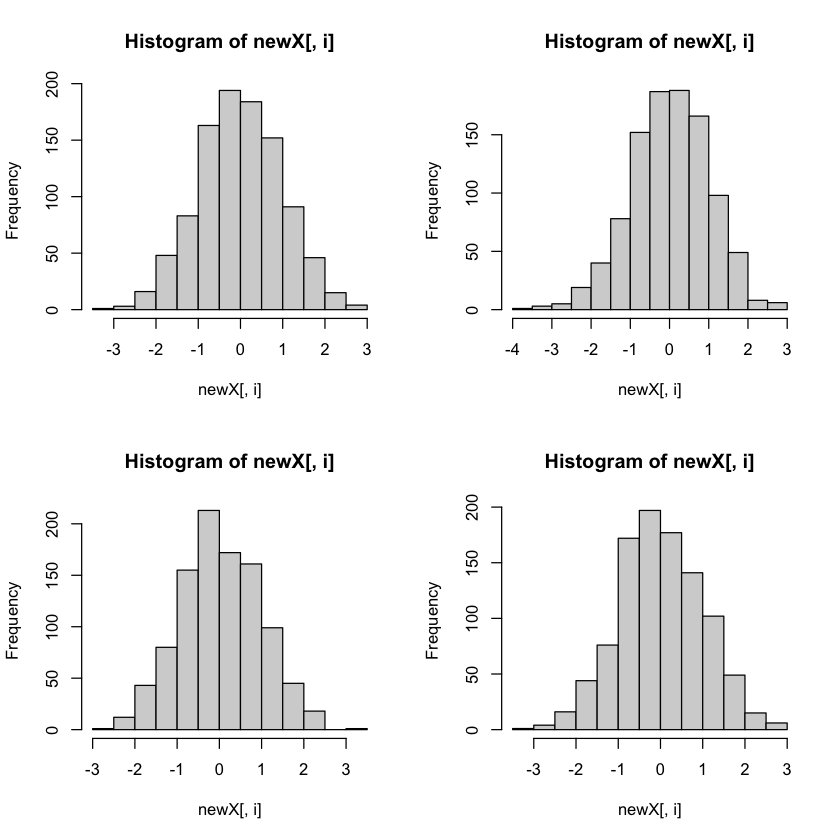

In [31]:
# generate four samples of 1000 random variable from the normal distribution
random_normal <- generate.normal(S = 4, n = 1000, mu = 0, sigma = 1)

# display plots 2 by 2
par(mfrow=c(2,2))

# samples are stored row wise, so we call margin = 1
plots <- apply(random_normal, 1, hist)

So these are just a few examples of how the `*apply` family can make plenty of calculations in just a couple of lines of code! I really find the `*apply`-functions super useful!